In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [4]:
sleep_data = pd.read_csv('Updated_sleep.csv')
volumes_data = pd.read_csv('Volumes_Merge_new_regions.csv')

In [5]:
VISCODE = {
        0: "bl", 1: "m06", 2: "m12", 3: "m24"}

In [6]:
sleep_data['VISCODE'] = sleep_data['VISCODE'].map(VISCODE)

In [7]:
volumes_data 

,RightEntorhinal,RightTemporalPole,RightParahippocampal,RightInferiorTemporal,RightMiddleTemporal,RightFusiform,RightInferiorParietal,RightIsthmusCingulate,RightBankssts,RightPrecuneus,...,MHPSYCH,MH2NEURL,MH4CARD,MH5RESP,MH19OTHR,ADNI_MEM,ADNI_EF,ADNI_VS,ADNI_LAN,ADNI_EF2
0,1183.0,1159.0,1994.0,8612.0,9311.0,7010.0,11950.0,2168.0,2893.0,8089.0,...,0,0,1,0,0,-1.187,-0.674,-1.221,-1.638,-0.670
1,834.0,1350.0,1776.0,7542.0,9736.0,7624.0,11785.0,2002.0,2750.0,7580.0,...,0,0,1,0,0,-0.914,-0.969,-0.548,-1.837,-1.034
2,545.0,1279.0,1701.0,7534.0,9316.0,7264.0,11152.0,2129.0,2770.0,7697.0,...,0,0,1,0,0,-1.369,-1.511,0.739,-1.700,-1.605
3,985.0,1341.0,1881.0,8355.0,10387.0,8005.0,11917.0,2204.0,2887.0,8112.0,...,0,0,1,0,0,-1.021,-1.144,-0.880,-1.368,-1.062
4,1907.0,1913.0,2105.0,9535.0,11501.0,12024.0,14271.0,2040.0,2374.0,9163.0,...,0,0,0,0,0,0.535,0.218,0.739,-0.129,0.098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,1723.0,2112.0,1621.0,10043.0,11010.0,6160.0,12228.0,1816.0,1718.0,7148.0,...,1,0,1,0,0,-0.531,-0.101,-0.080,-1.045,0.153
2097,1574.0,2117.0,2007.0,9070.0,12815.0,8297.0,13912.0,2144.0,2229.0,7920.0,...,0,0,1,1,0,-1.445,-1.642,-1.813,-1.640,-1.788
2098,1739.0,2208.0,2007.0,8904.0,12154.0,8450.0,13366.0,2116.0,2148.0,8087.0,...,0,0,1,1,0,-1.764,-1.625,-0.656,-0.946,-2.047
2099,1694.0,2227.0,2200.0,8571.0,12525.0,8511.0,13866.0,2086.0,2390.0,7989.0,...,0,0,1,1,0,-1.826,-2.384,-2.184,-1.818,-2.661


In [8]:
merged_data = pd.merge(sleep_data, volumes_data, on=[
                       'RID', 'VISCODE'])

In [9]:
sleep_vars = ['NPIK', 'NPIKSEV', 'Sleep_Apnea', 'Restless_Legs',
              'Insomnia', 'Sleep_Disturbance_Other']

mri_outcomes = [col for col in merged_data.columns if col.startswith(
    ('Left', 'Right', 'Corpus', 'Brainstem', 'Csf', 'Icv', 'Fourth', 'NonWMH', 'Third', 'WMH', 'Optic'))]
print(mri_outcomes)

['RightEntorhinal', 'RightTemporalPole', 'RightParahippocampal', 'RightInferiorTemporal', 'RightMiddleTemporal', 'RightFusiform', 'RightInferiorParietal', 'RightIsthmusCingulate', 'RightBankssts', 'RightPrecuneus', 'RightHippocampus', 'RightAmygdala', 'RightAccumbensArea', 'RightMedialOrbitofrontal', 'RightPallidum', 'RightCaudalMiddleFrontal', 'RightPutamen', 'RightRostralAnteriorCingulate', 'RightParacentral', 'RightPrecentral', 'RightLingual', 'LeftEntorhinal', 'LeftHippocampus', 'LeftFusiform', 'LeftMiddleTemporal', 'LeftParacentral', 'RightInferiorLateralVentricle', 'LeftInferiorLateralVentricle', 'RightLateralVentricle', 'LeftLateralVentricle', 'Icv']


In [77]:
psychometric_vars = ['ADNI_MEM', 'ADNI_EF', 'ADNI_VS', 'ADNI_LAN', 'ADNI_EF2']
sociodemo_outcomes = ['Adjusted_Age', 'PTGENDER', 'PTEDUCAT',
                      'PTETHCAT', 'PTRACCAT', 'PTMARRY', 'APOE4','MHPSYCH','MH2NEURL','MH4CARD','MH5RESP','MH19OTHR']

In [11]:
target_groups = {
    'MRI': mri_outcomes,
    'Psychometric': psychometric_vars,
    'Sociodemographic': sociodemo_outcomes
}

In [12]:
from statsmodels.tsa.stattools import grangercausalitytests
from scipy.stats import pearsonr


def perform_granger_causality(df, var1, var2, max_lag=3):
    """
    Perform Granger Causality Test to assess bidirectional relationship.
    Returns p-values for Granger causality in both directions.
    """
    try:
        data = df[[var1, var2]].dropna()
        result_1 = grangercausalitytests(data, max_lag)
        p_val_1 = result_1[1][0]['ssr_ftest'][1]

        result_2 = grangercausalitytests(
            data[[var2, var1]].dropna(), max_lag)
        p_val_2 = result_2[1][0]['ssr_ftest'][1]

        return p_val_1, p_val_2
    except Exception as e:
        return np.nan, np.nan

In [17]:
def calculate_correlation(df, var1, var2):
    """
    Calculate Pearson correlation between two variables.
    Convert non-numeric columns to numeric before correlation.
    """
    corr_df = df[[var1, var2]].dropna()

    corr_df[var1] = pd.to_numeric(corr_df[var1], errors='coerce')
    corr_df[var2] = pd.to_numeric(corr_df[var2], errors='coerce')

    corr_df = corr_df.dropna()

    if not corr_df.empty and len(corr_df) > 1:
        corr_value, p_value = pearsonr(corr_df[var1], corr_df[var2])
        return corr_value, p_value
    else:
        return np.nan, np.nan

In [18]:
cn_data = merged_data[merged_data['DX_bl'] == 'CN']
mci_data = merged_data[merged_data['DX_bl'] == 'LMCI']
ad_data = merged_data[merged_data['DX_bl'] == 'AD']

In [19]:
cn_data = cn_data.sort_values(by=['RID', 'VISCODE'])
mci_data = mci_data.sort_values(by=['RID', 'VISCODE'])
ad_data = ad_data.sort_values(by=['RID', 'VISCODE'])

In [20]:
print(f"CN Data Shape: {cn_data.shape}")
print(f"MCI Data Shape: {mci_data.shape}")
print(f"AD Data Shape: {ad_data.shape}")

CN Data Shape: (717, 60)
MCI Data Shape: (959, 60)
AD Data Shape: (425, 60)


In [21]:
group_data = {
    'CN': cn_data,
    'MCI': mci_data,
    'AD': ad_data
}

In [22]:
results_list = []
for group_name, group_df in group_data.items():
    print(f"Analyzing {group_name} Group...")

    for sleep_var in sleep_vars:
        for outcome in mri_outcomes + psychometric_vars + sociodemo_outcomes:
            p_val_1, p_val_2 = perform_granger_causality(
                group_df, sleep_var, outcome)

            corr_value, corr_p_value = calculate_correlation(
                group_df, sleep_var, outcome)

            results_list.append({
                'Group': group_name,
                'Sleep_Variable': sleep_var,
                'Outcome': outcome,
                'Metric': 'Correlation',
                'Value': corr_value,
                'p_value': corr_p_value
            })

            results_list.append({
                'Group': group_name,
                'Sleep_Variable': sleep_var,
                'Outcome': outcome,
                'Metric': 'Sleep_to_Outcome',
                'Value': p_val_1,
                'p_value': p_val_1
            })

            results_list.append({
                'Group': group_name,
                'Sleep_Variable': sleep_var,
                'Outcome': outcome,
                'Metric': 'Outcome_to_Sleep',
                'Value': p_val_2,
                'p_value': p_val_2
            })

Analyzing CN Group...

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4882  , p=0.4850  , df_denom=713, df_num=1
ssr based chi2 test:   chi2=0.4902  , p=0.4838  , df=1
likelihood ratio test: chi2=0.4900  , p=0.4839  , df=1
parameter F test:         F=0.4882  , p=0.4850  , df_denom=713, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4739  , p=0.6228  , df_denom=710, df_num=2
ssr based chi2 test:   chi2=0.9545  , p=0.6205  , df=2
likelihood ratio test: chi2=0.9539  , p=0.6207  , df=2
parameter F test:         F=0.4739  , p=0.6228  , df_denom=710, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2951  , p=0.8290  , df_denom=707, df_num=3
ssr based chi2 test:   chi2=0.8939  , p=0.8269  , df=3
likelihood ratio test: chi2=0.8934  , p=0.8270  , df=3
parameter F test:         F=0.2951  , p=0.8290  , df_denom=707, df_num=3

Granger Causality
number of lags (no zero) 1
ssr based F test:         

c:\Users\anisr\anaconda3\envs\research\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
c:\Users\anisr\anaconda3\envs\research\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
c:\Users\anisr\anaconda3\envs\research\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
c:\Users\anisr\anaconda3\envs\research\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
c:\Users\anisr\anaconda3\envs\research\lib\site-packages\scipy\stats\_stats_


Granger Causality
number of lags (no zero) 1

Granger Causality
number of lags (no zero) 1

Granger Causality
number of lags (no zero) 1

Granger Causality
number of lags (no zero) 1

Granger Causality
number of lags (no zero) 1

Granger Causality
number of lags (no zero) 1

Granger Causality
number of lags (no zero) 1

Granger Causality
number of lags (no zero) 1

Granger Causality
number of lags (no zero) 1

Granger Causality
number of lags (no zero) 1
Analyzing MCI Group...

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3183  , p=0.1282  , df_denom=955, df_num=1
ssr based chi2 test:   chi2=2.3255  , p=0.1273  , df=1
likelihood ratio test: chi2=2.3227  , p=0.1275  , df=1
parameter F test:         F=2.3183  , p=0.1282  , df_denom=955, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.4715  , p=0.2301  , df_denom=952, df_num=2
ssr based chi2 test:   chi2=2.9585  , p=0.2278  , df=2
likelihood ratio test: chi2=2.9540  , p=0

In [23]:
mri_outcomes = list(mri_outcomes)
psychometric_outcomes = list(psychometric_vars)
sociodemographic_outcomes = list(
    sociodemo_outcomes)

In [52]:
results_df = pd.DataFrame(results_list)

In [53]:
corr_df = results_df[results_df['Metric'] == 'Correlation']

pivot_df = corr_df.pivot_table(
    index=['Sleep_Variable', 'Outcome'],
    columns='Group',
    values='Value'
).reset_index()

pivot_df = pivot_df.sort_values(by='AD', ascending=False)

In [54]:
pivot_df 

Group,Sleep_Variable,Outcome,AD,CN,MCI
194,Sleep_Apnea,MH5RESP,0.306689,0.267800,0.249820
235,Sleep_Disturbance_Other,MH19OTHR,0.235580,NaN,-0.034582
15,Insomnia,MH19OTHR,0.223341,0.165825,0.273125
251,Sleep_Disturbance_Other,RightIsthmusCingulate,0.220827,NaN,-0.109717
150,Restless_Legs,MH5RESP,0.215829,0.161504,0.172946
...,...,...,...,...,...
179,Sleep_Apnea,ADNI_MEM,-0.158376,-0.072259,-0.014527
178,Sleep_Apnea,ADNI_LAN,-0.160538,-0.010254,0.007888
258,Sleep_Disturbance_Other,RightParahippocampal,-0.181336,NaN,-0.025027
91,NPIKSEV,ADNI_MEM,-0.190129,0.085649,-0.018067


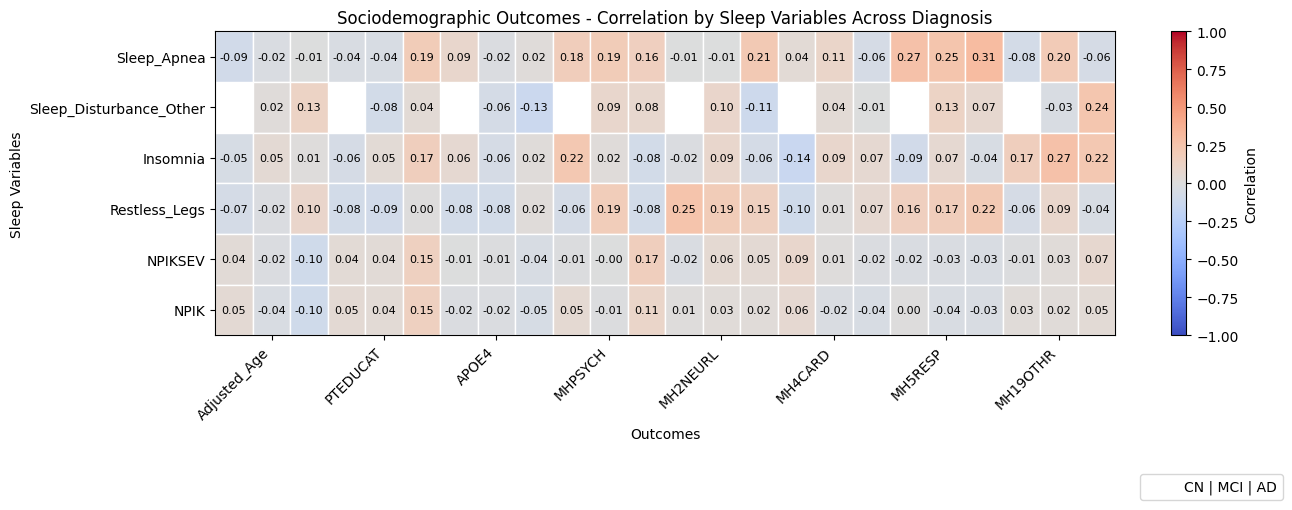

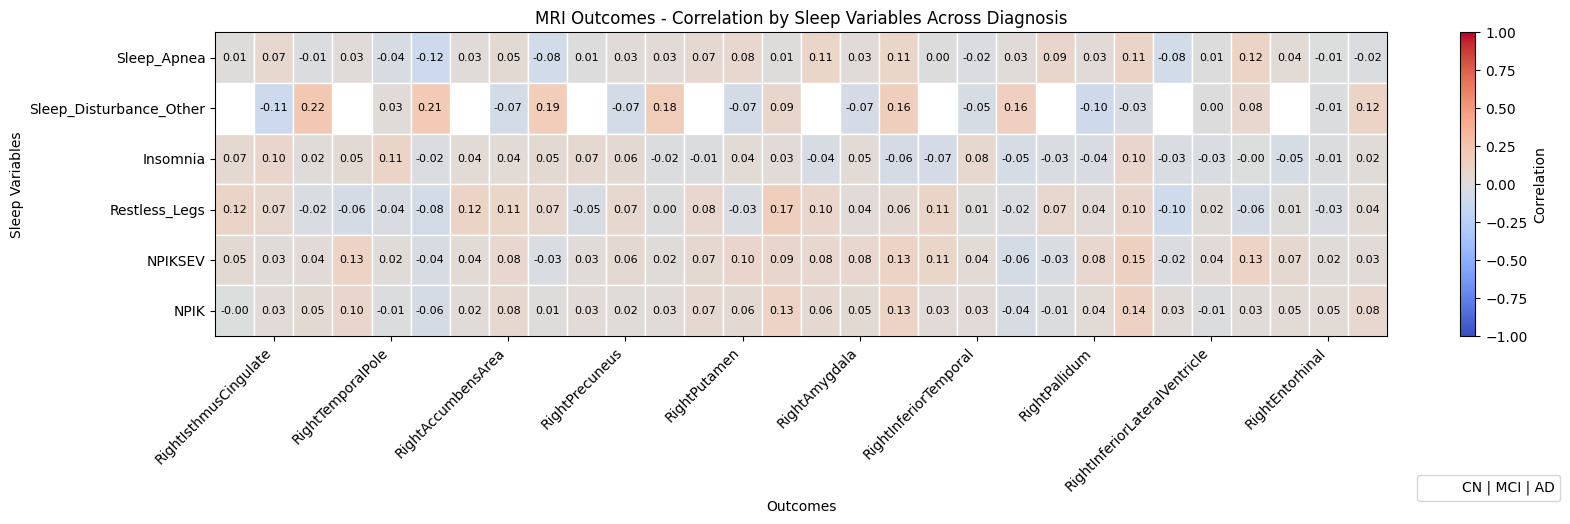

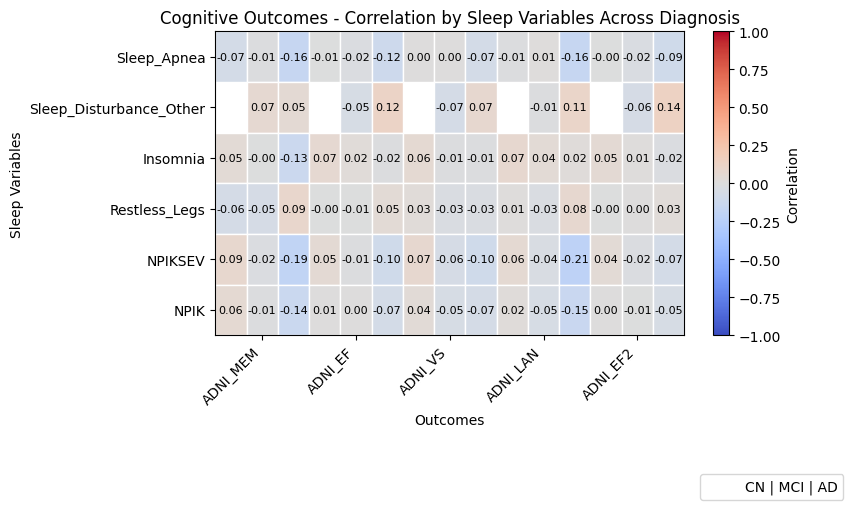

In [ ]:
import matplotlib.patches as patches
mri_top10 = pivot_df[pivot_df['Outcome'].isin(mri_outcomes)].sort_values(
    by='AD', ascending=False)['Outcome'].unique()[:10]
sociodemo_outcomes = list(sociodemographic_outcomes)
cog_outcomes = list(psychometric_outcomes)

outcome_categories = {
    "Sociodemographic Outcomes": sociodemo_outcomes,
    "MRI Outcomes": mri_top10,
    "Cognitive Outcomes": cog_outcomes
}

vmin, vmax = -1, 1 

cmap = plt.cm.coolwarm
diagnoses = ['CN', 'MCI', 'AD']
diagnosis_colors = {'CN': 'blue', 'MCI': 'green', 'AD': 'red'}

fig_idx = 1
for title, outcomes in outcome_categories.items():
    sleep_vars = pivot_df['Sleep_Variable'].unique()
    outcome_vars = [o for o in outcomes if o in pivot_df['Outcome'].values]

    fig, ax = plt.subplots(figsize=(1.7 * len(outcome_vars), 1 * len(sleep_vars)))
    ax.set_title(f'{title} - Correlation by Sleep Variables Across Diagnosis')

    for i, sleep in enumerate(sleep_vars):
        for j, outcome in enumerate(outcome_vars):
            row = pivot_df[(pivot_df['Sleep_Variable'] == sleep)
                           & (pivot_df['Outcome'] == outcome)]
            if row.empty:
                continue

            x, y = j, i
            width = 1.0 / len(diagnoses)

            for k, diag in enumerate(diagnoses):
                val = row[diag].values[0] if diag in row.columns else np.nan
                if pd.isna(val):
                    continue

                color = cmap((val - vmin) / (vmax - vmin))
                rect = patches.Rectangle(
                    (x + k * width, y), width, 1, facecolor=color, edgecolor='white')
                ax.add_patch(rect)
                ax.text(x + k * width + width / 2, y + 0.5, f'{val:.2f}',
                        ha='center', va='center', color='black', fontsize=8)

    ax.set_xticks(np.arange(len(outcome_vars)) + 0.5)
    ax.set_xticklabels(outcome_vars, rotation=45, ha='right')
    ax.set_yticks(np.arange(len(sleep_vars)) + 0.5)
    ax.set_yticklabels(sleep_vars)
    ax.set_xlim(0, len(outcome_vars))
    ax.set_ylim(0, len(sleep_vars))
    ax.invert_yaxis()
    ax.set_xlabel('Outcomes')
    ax.set_ylabel('Sleep Variables')

    sm = plt.cm.ScalarMappable(
        cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    cbar = fig.colorbar(sm, ax=ax, orientation='vertical')
    cbar.set_label('Correlation')

    legend_patches = [patches.Patch(color='white', label='CN | MCI | AD')]
    ax.legend(handles=legend_patches, loc='center left', bbox_to_anchor=(1.02, -0.5), frameon=True)

    plt.tight_layout()
    plt.show()
    fig_idx += 1

In [67]:
granger_results = results_df[results_df['Metric'] != 'Correlation']

ValueError: list.remove(x): x not in list

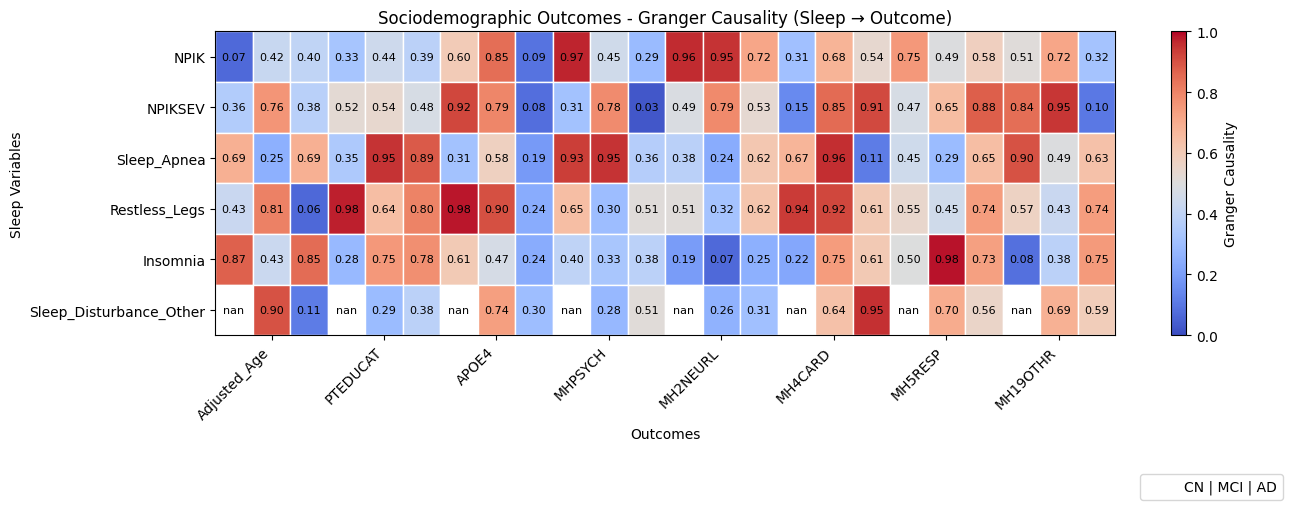

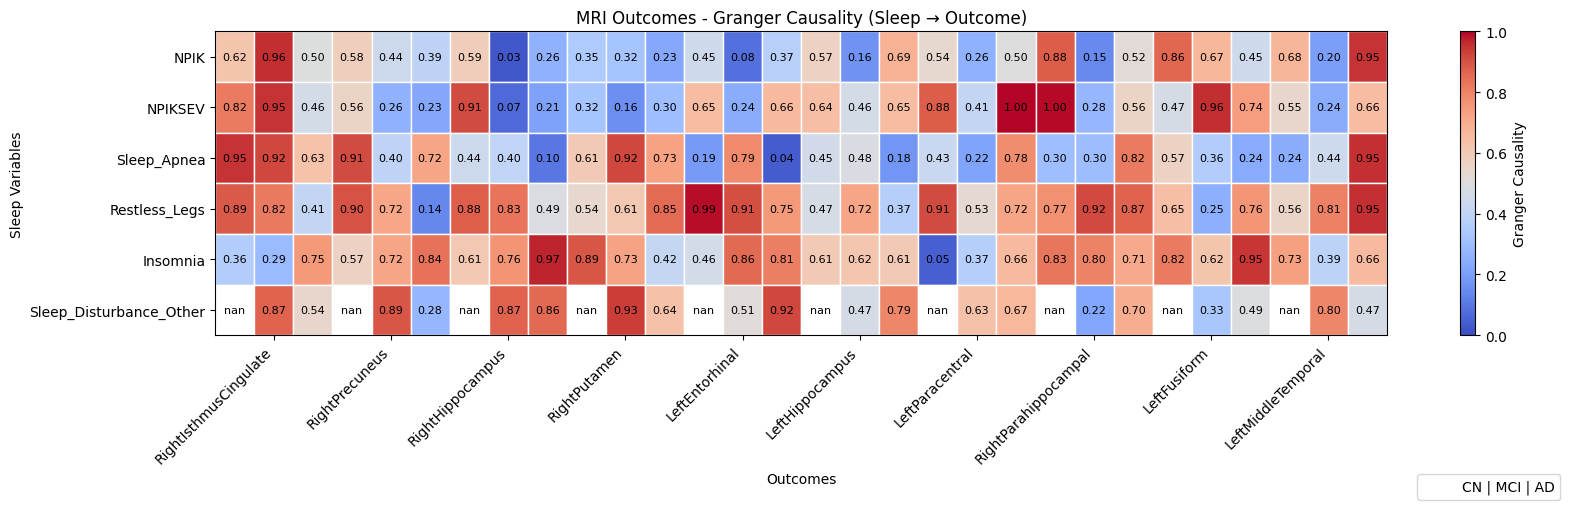

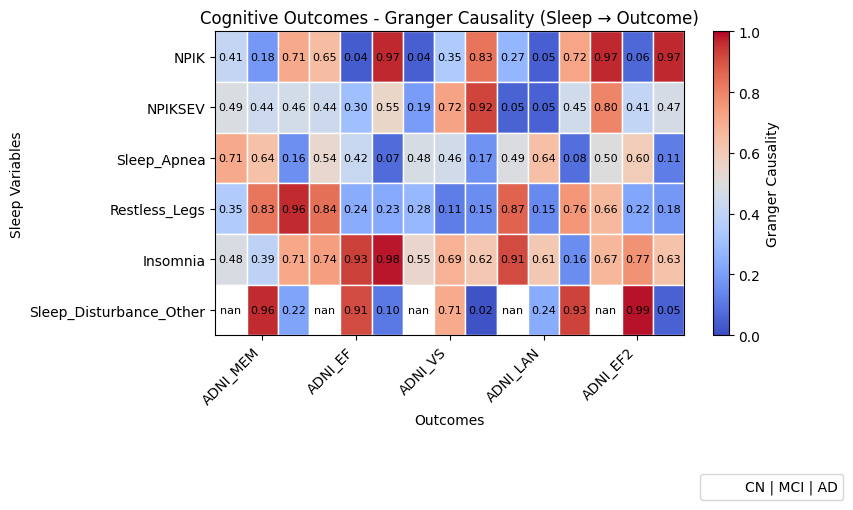

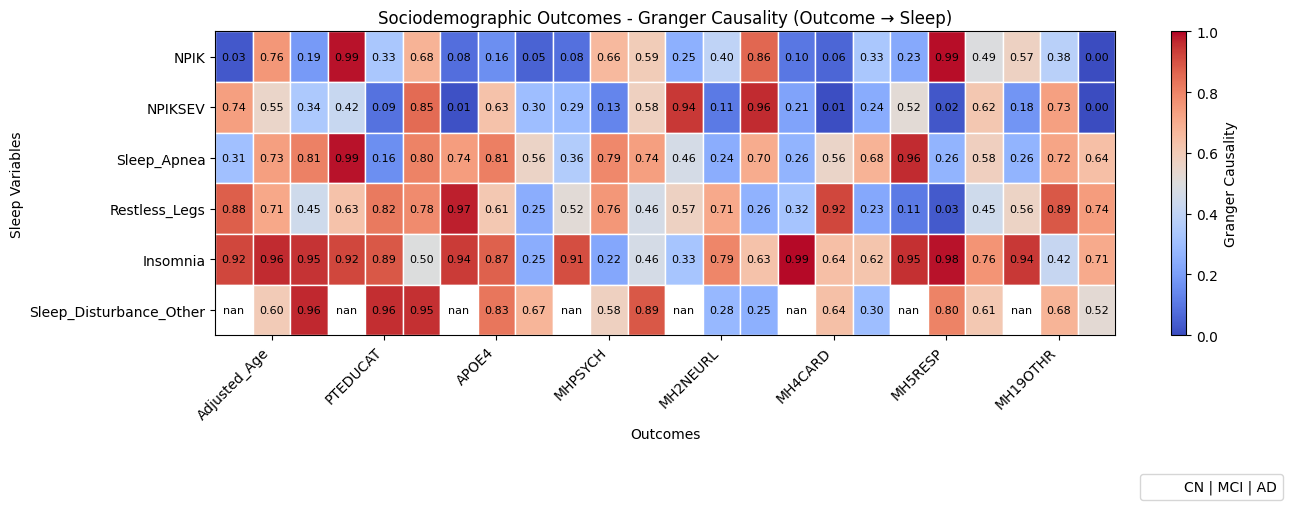

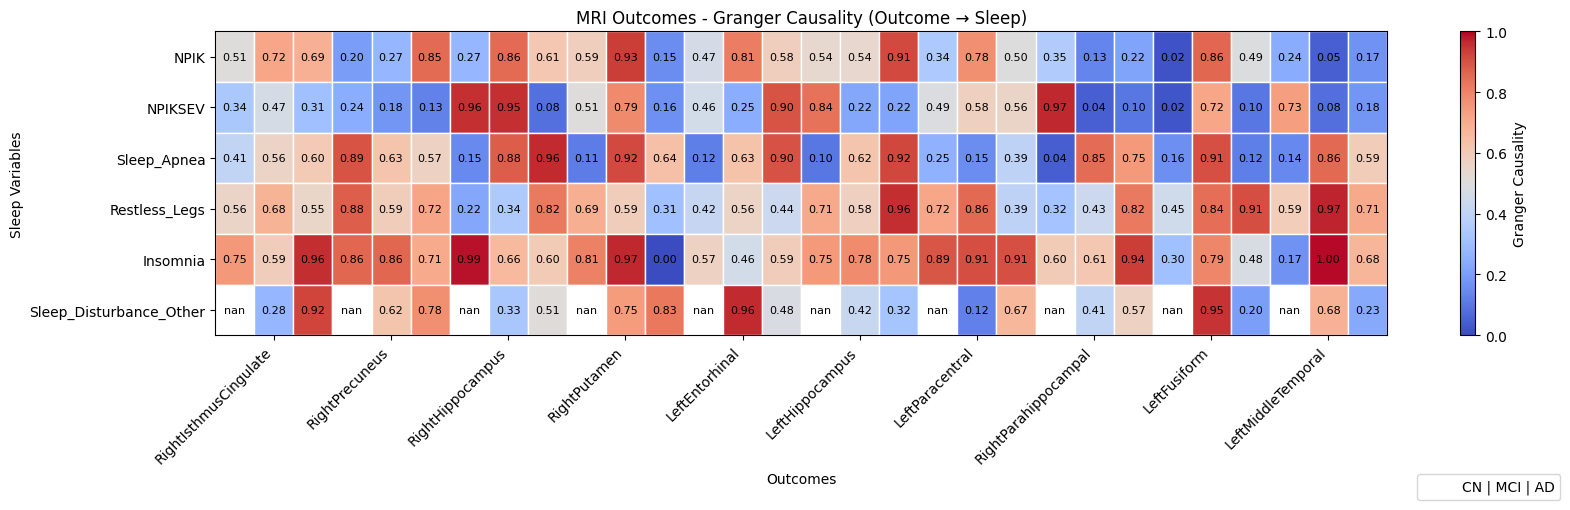

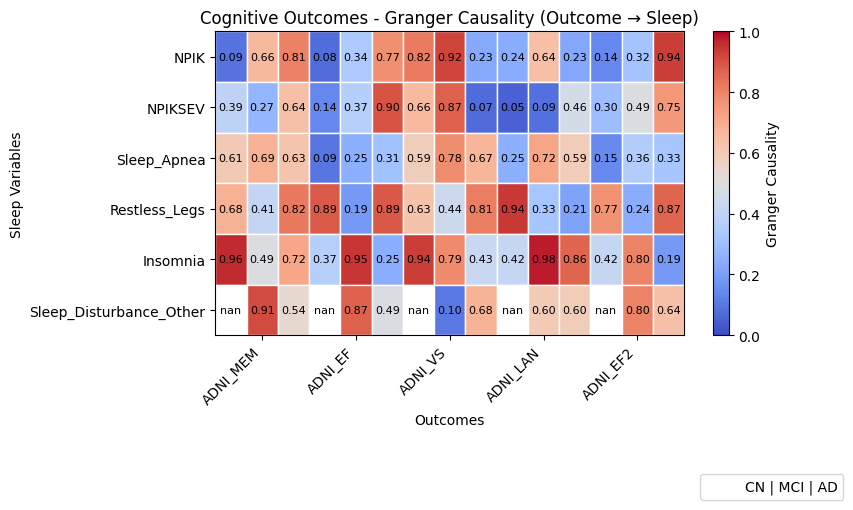

In [89]:
mri_top10 = granger_results[granger_results['Outcome'].str.contains("Right|Left")].groupby(
    'Outcome')['Value'].mean().sort_values(ascending=False).head(10).index.tolist()
sociodemo_outcomes = sociodemographic_outcomes
for col in ['PTGENDER', 'PTETHCAT', 'PTRACCAT', 'PTMARRY']:
	if col in sociodemo_outcomes:
		sociodemo_outcomes.remove(col)
psychometric_outcomes = psychometric_vars
outcome_categories = {
    "Sociodemographic Outcomes": sociodemo_outcomes,
    "MRI Outcomes": mri_top10,
    "Cognitive Outcomes": psychometric_outcomes
}
vmin, vmax = 0, 1  
cmap = plt.cm.coolwarm
diagnoses = ['CN', 'MCI', 'AD']


def plot_granger_matrix(data, direction_label):
    for title, outcomes in outcome_categories.items():
        filtered_df = data[data['Outcome'].isin(outcomes)]
        sleep_vars = filtered_df['Sleep_Variable'].unique()
        outcome_vars = [
            o for o in outcomes if o in filtered_df['Outcome'].values]

        fig, ax = plt.subplots(
            figsize=(1.7 * len(outcome_vars), 1 * len(sleep_vars)))
        ax.set_title(f'{title} - Granger Causality ({direction_label})')

        for i, sleep in enumerate(sleep_vars):
            for j, outcome in enumerate(outcome_vars):
                row = filtered_df[(filtered_df['Sleep_Variable'] == sleep) & (
                    filtered_df['Outcome'] == outcome)]
                if row.empty:
                    continue

                x, y = j, i
                width = 1.0 / len(diagnoses)

                for k, diag in enumerate(diagnoses):
                    val_row = row[row['Group'] == diag]
                    if val_row.empty:
                        continue

                    val = val_row['Value'].values[0]
                    color = cmap((val - vmin) / (vmax - vmin))
                    rect = patches.Rectangle(
                        (x + k * width, y), width, 1, facecolor=color, edgecolor='white')
                    ax.add_patch(rect)
                    ax.text(x + k * width + width / 2, y + 0.5,
                            f'{val:.2f}', ha='center', va='center', color='black', fontsize=8)

        ax.set_xticks(np.arange(len(outcome_vars)) + 0.5)
        ax.set_xticklabels(outcome_vars, rotation=45, ha='right')
        ax.set_yticks(np.arange(len(sleep_vars)) + 0.5)
        ax.set_yticklabels(sleep_vars)
        ax.set_xlim(0, len(outcome_vars))
        ax.set_ylim(0, len(sleep_vars))
        ax.invert_yaxis()
        ax.set_xlabel('Outcomes')
        ax.set_ylabel('Sleep Variables')

        sm = plt.cm.ScalarMappable(
            cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
        cbar = fig.colorbar(sm, ax=ax, orientation='vertical')
        cbar.set_label('Granger Causality')

        legend_patches = [patches.Patch(color='white', label='CN | MCI | AD')]
        ax.legend(handles=legend_patches, loc='center left',
                  bbox_to_anchor=(1.02, -0.5), frameon=True)

        plt.tight_layout()
        plt.show()


sleep_to_outcome = granger_results[granger_results['Metric']
                                   == 'Sleep_to_Outcome']
outcome_to_sleep = granger_results[granger_results['Metric']
                                   == 'Outcome_to_Sleep']

plot_granger_matrix(sleep_to_outcome, 'Sleep → Outcome')
plot_granger_matrix(outcome_to_sleep, 'Outcome → Sleep')